<a href="https://colab.research.google.com/github/WisdomVoyager/A-B_Testing_Projects/blob/main/Cookie_Cats_A_B_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. About the APP
<p>Cookie Cats is a highly popular mobile puzzle game developed by Tactile Entertainment, featuring adorable singing cats. The gameplay involves connecting tiles of the same color to clear the board and advance through levels. </p>
<p><a href="https://youtu.be/GaP5f0jVTWE"><img src="https://assets.datacamp.com/production/project_184/img/cookie_cats_video.jpeg" style="width: 500px"></a></p>
<p>As players progress through the levels of the game,occasionally, players encounter gates that impose a wait time or offer in-app purchases to progress further. These gates not only drive in-app revenue but also provide players with enforced breaks to enhance their overall enjoyment and engagement with the game.</p>
<p><img src="https://assets.datacamp.com/production/project_184/img/cc_gates.png" alt></p>
<p>In this analysis,the focus will be on an AB test conducted in Cookie Cats, where the first gate's placement was shifted from level 30 to level 40. The primary objective is to examine the impact of this change on player retention. Before delving into the analysis, it is crucial to comprehend the underlying data to make informed decisions and draw meaningful insights from the experiment.</p>

## Data and Setup

### Import Numpy, Pandas, Matplotlib and Seaborn libraries for Data Analysis and Data Vizualisation.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read in the csv file as a dataframe called df

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


## Exploring the dataset before A/B Testing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


The data is from 90,189 players that installed the game while the AB-test was running. The variables are:

*   userid - a unique number that identifies each player.
*   version - whether the player was put in the control group (gate_30 - a gate at level 30) or the group  with the moved gate (gate_40 - a gate at level 40).
*   sum_gamerounds - the number of game rounds played by the player during the first 14 days after install.
*   retention_1 - did the player come back and play 1 day after installing?
*   retention_7 - did the player come back and play 7 days after installing?









In the AB test conducted for Cookie Cats, players were randomly assigned to either the "gate_30" or "gate_40" group when they installed the game. To ensure the test's validity, a sanity check was performed to confirm if there were approximately an equal number of players in each AB group, validating the random assignment process.

In [ ]:
# Before doing any A/B testing we need to make sure that the control groups(versions) are uniform to remove bais.
df['version'].value_counts()

gate_40    45489
gate_30    44700
Name: version, dtype: int64

In [ ]:
#To see the percentage distribution
df['version'].value_counts(normalize=True)

gate_40    0.504374
gate_30    0.495626
Name: version, dtype: float64

### The distribution in control groups is almost 50-50% so its good to move further.

## The distribution of game rounds

### Counting the number of players for each number of game rounds
The variable `plot_df` contains a pandas Series resulting from a groupby operation on the DataFrame `df`. It shows the count of users for each value in the "sum_gamerounds" column. Essentially, it presents a distribution of how many users completed a specific number of game rounds, offering insights into player engagement patterns in the game.

In [ ]:
plot_df = df.groupby('sum_gamerounds')['userid'].count()
plot_df

sum_gamerounds
0        3994
1        5538
2        4606
3        3958
4        3629
         ... 
2294        1
2438        1
2640        1
2961        1
49854       1
Name: userid, Length: 942, dtype: int64

### Plotting histogram distribution of the first 100 users based on their "sum_gamerounds" (total number of game rounds played).
This plot helps visualize the frequency of users falling into different game round ranges, offering insights into player engagement patterns.

Text(0, 0.5, 'User Count')

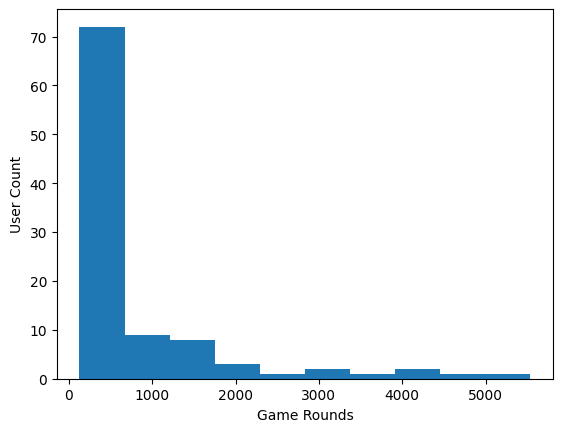

In [ ]:
ax = plot_df.head(n=100).plot(x='sum_gamerounds',y='userid',kind = 'hist')
ax.set_xlabel("Game Rounds")
ax.set_ylabel("User Count")

There is skewness in the data. The histogram above depicts the distribution of game rounds played by players in Cookie Cats. It reveals that most of players install the game but do not engage in any game rounds, while others play a few rounds during their initial week, and there are also highly engaged players who become significantly hooked and play numerous game rounds.

## 1-day retention Analysis and AB Testing

In video games one day retention is important to know how engaging the game is and we want to focus on the ones which have high first day retentionThe percentage of players that comes back and plays the game one day after they have installed it. The higher 1-day retention is, the easier it is to retain players and build a large player base.

In [ ]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


### The % of users that came back the day after they installed

In [ ]:
# calculating one day retention rate
df['retention_1'].sum()/df['retention_1'].count()

0.4452095044850259

### Calculating 1-day retention for each AB-group

In [ ]:
# calculating one day retention rate for version
df.groupby('version')['retention_1'].sum()/df.groupby('version')['userid'].count()

version
gate_30    0.448188
gate_40    0.442283
dtype: float64

In [ ]:
# it can be said that there was slight decrease in one day retention when gate was moved to 40.

After moving the gate to level 40 in Cookie Cats, there was a slight decrease in the one-day retention rate, dropping from 44.8% (when the gate was at level 30) to 44.2%. Although the change may seem small, even minor alterations in retention can have significant implications for the game's success and player engagement.

### To assess the certainty of these retention numbers, bootstrapping is employed. Through this statistical technique, the dataset is repeatedly resampled with replacement, and the one-day retention is calculated for each sample. The variation observed in the one-day retention values obtained from multiple resampling iterations provides an insight into the level of uncertainty associated with the retention rates. By understanding the uncertainty, we can make more informed decisions regarding the optimal placement of the gate for the future of the game.





### Bootstrap sampling for DAY-1 retention

Creating an list with bootstrapped means for each AB-group

In [ ]:
# keeping the number of bootstrap replication to 500 to keep the calculations quick
boot_1d = []

for i in range(500):
    boot_mean = df.sample(frac=1,replace=True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)

boot_1d

[version
 gate_30    0.449944
 gate_40    0.442142
 Name: retention_1, dtype: float64,
 version
 gate_30    0.446208
 gate_40    0.443185
 Name: retention_1, dtype: float64,
 version
 gate_30    0.448958
 gate_40    0.445089
 Name: retention_1, dtype: float64,
 version
 gate_30    0.446299
 gate_40    0.439930
 Name: retention_1, dtype: float64,
 version
 gate_30    0.449831
 gate_40    0.442560
 Name: retention_1, dtype: float64,
 version
 gate_30    0.450426
 gate_40    0.438413
 Name: retention_1, dtype: float64,
 version
 gate_30    0.451980
 gate_40    0.443749
 Name: retention_1, dtype: float64,
 version
 gate_30    0.448872
 gate_40    0.441184
 Name: retention_1, dtype: float64,
 version
 gate_30    0.45127
 gate_40    0.43972
 Name: retention_1, dtype: float64,
 version
 gate_30    0.441796
 gate_40    0.439551
 Name: retention_1, dtype: float64,
 version
 gate_30    0.448822
 gate_40    0.444889
 Name: retention_1, dtype: float64,
 version
 gate_30    0.449878
 gate_40    0.4

Transforming the list to a DataFrame

In [ ]:
boot_1d = pd.DataFrame(boot_1d)
boot_1d

version,gate_30,gate_40
retention_1,0.449944,0.442142
retention_1,0.446208,0.443185
retention_1,0.448958,0.445089
retention_1,0.446299,0.439930
retention_1,0.449831,0.442560
...,...,...
retention_1,0.449290,0.443639
retention_1,0.447267,0.444496
retention_1,0.449701,0.439885
retention_1,0.449731,0.442387


 A Kernel Density Estimate plot of the bootstrap distributions

A Kernel Density Estimate (KDE) plot of the bootstrap distributions visually represents the probability density function of the resampled retention rates. It provides a smooth curve that approximates the underlying distribution of the retention rates, allowing us to observe the spread of values and the likelihood of different retention rate outcomes. This plot aids in understanding the uncertainty associated with the retention rates and provides valuable insights for decision-making in the game's future gate placement strategy.

<Axes: ylabel='Density'>

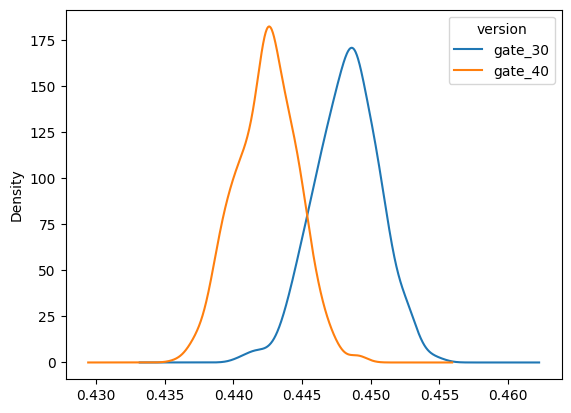

In [ ]:
boot_1d.plot(kind='kde')

The displayed KDE plot represents the bootstrap uncertainty for the underlying one-day retention rates in the two AB groups. Although the difference appears subtle, visual inspection suggests the existence of some evidence indicating a discrepancy between the groups. To gain a closer look at this difference in one-day retention, further examination is warranted.

### A new column will be added to the data, calculating the percentage difference between the two AB groups' retention rates.

In [ ]:
boot_1d['diff'] = (boot_1d['gate_30'] - boot_1d['gate_40']) / boot_1d['gate_40']*100
boot_1d

version,gate_30,gate_40,diff
retention_1,0.449944,0.442142,1.764700
retention_1,0.446208,0.443185,0.682212
retention_1,0.448958,0.445089,0.869294
retention_1,0.446299,0.439930,1.447688
retention_1,0.449831,0.442560,1.642906
...,...,...,...
retention_1,0.449290,0.443639,1.273861
retention_1,0.447267,0.444496,0.623453
retention_1,0.449701,0.439885,2.231495
retention_1,0.449731,0.442387,1.659976


### Ploting the bootstrap % difference

Text(0.5, 0, '% difference in means')

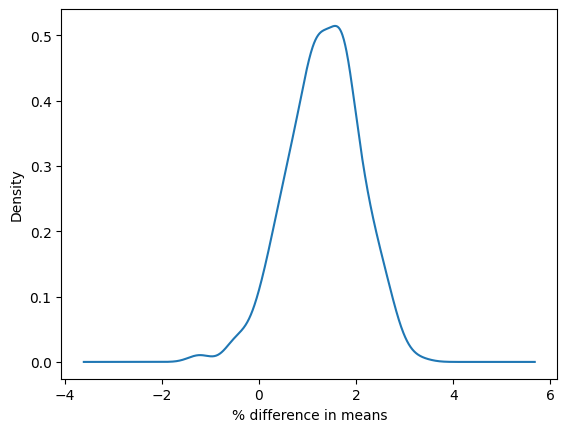

In [ ]:
ax= boot_1d['diff'].plot(kind='kde')
ax.set_xlabel("% difference in means")

### Probability of a difference
The probability of observing a difference in retention rates between the two AB groups when considering 1-day retention.

By analyzing the chart, we observe that the most probable percentage difference between the two AB groups is around 1% - 3%, with a significant portion of the distribution above 0%, favoring a gate at level 30. To determine the probability that the difference is above 0%, this calculation will be performed to provide a quantified measure of the likelihood.

In [ ]:
# Calculating the probability that 1-day retention is greater when the gate is at level 30.
(boot_1d['diff']>0).sum()/len(boot_1d)

0.96

## 7-day retention Analysis and AB Testing

According to the bootstrap analysis, there is a high probability that the one-day retention is better when the gate is placed at level 30 compared to level 40. However, it is important to consider that within just one day of playing, many players may not have reached level 30 yet. Consequently, the impact of the gate might not have been fully experienced by a significant portion of the player base.

To gain a more comprehensive understanding of player retention, it is necessary to examine the 7-day retention metric. By assessing the percentage of players who reinstall the game and continue to engage with it a week later, we can account for the increased likelihood of a higher number of players reaching level 40 during this extended timeframe. This analysis will provide valuable insights into the long-term impact of gate placement on player engagement and retention.

In [ ]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


### The % of users that came back the day after they installed

In [ ]:
# calculating one day retention rate
df['retention_7'].sum()/df['retention_7'].count()

0.1860648194347426

### Calculating 1-day retention for each AB-group

In [ ]:
df.groupby('version')['retention_7'].sum()/df.groupby('version')['userid'].count()

version
gate_30    0.190201
gate_40    0.182000
dtype: float64

The 7-day retention is slightly lower (18.2%) when the gate is at level 40 compared to level 30 (19.0%). This difference is more significant than the 1-day retention difference, likely because more players had time to encounter the first gate. Overall, the 7-day retention rate is lower than the 1-day retention rate, indicating that fewer players continue playing a week after installing the game.

To quantify the certainty of the difference between the AB groups, a bootstrap analysis will be employed to provide valuable insights into the variation and reliability of the retention rates.

### Bootstrap sampling for DAY-1 retention

Creating an list with bootstrapped means for each AB-group

In [ ]:
# keeping the number of bootstrap replication to 500 to keep the calculations quick
boot_7d = []

for i in range(500):
    boot_mean = df.sample(frac=1,replace=True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)

boot_7d

[version
 gate_30    0.189406
 gate_40    0.182177
 Name: retention_7, dtype: float64,
 version
 gate_30    0.190792
 gate_40    0.185939
 Name: retention_7, dtype: float64,
 version
 gate_30    0.187841
 gate_40    0.180956
 Name: retention_7, dtype: float64,
 version
 gate_30    0.188532
 gate_40    0.181700
 Name: retention_7, dtype: float64,
 version
 gate_30    0.191970
 gate_40    0.180157
 Name: retention_7, dtype: float64,
 version
 gate_30    0.191611
 gate_40    0.182407
 Name: retention_7, dtype: float64,
 version
 gate_30    0.192364
 gate_40    0.181768
 Name: retention_7, dtype: float64,
 version
 gate_30    0.190336
 gate_40    0.180835
 Name: retention_7, dtype: float64,
 version
 gate_30    0.190712
 gate_40    0.183215
 Name: retention_7, dtype: float64,
 version
 gate_30    0.191997
 gate_40    0.178928
 Name: retention_7, dtype: float64,
 version
 gate_30    0.18874
 gate_40    0.18404
 Name: retention_7, dtype: float64,
 version
 gate_30    0.191839
 gate_40    0.1

Transforming the list to a DataFrame

In [ ]:
boot_7d = pd.DataFrame(boot_7d)
boot_7d

version,gate_30,gate_40
retention_7,0.189406,0.182177
retention_7,0.190792,0.185939
retention_7,0.187841,0.180956
retention_7,0.188532,0.181700
retention_7,0.191970,0.180157
...,...,...
retention_7,0.191336,0.180630
retention_7,0.192632,0.182723
retention_7,0.189473,0.181150
retention_7,0.187656,0.181852


 A Kernel Density Estimate plot of the bootstrap distributions

<Axes: ylabel='Density'>

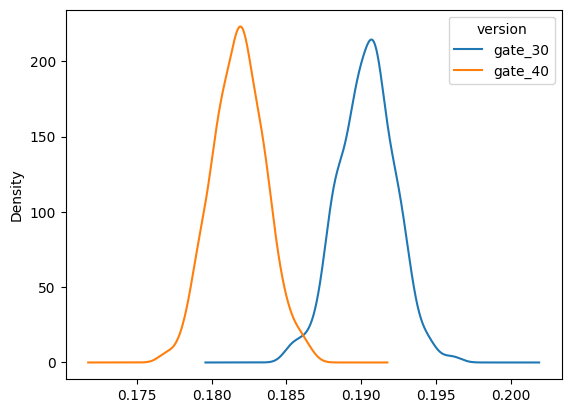

In [ ]:
boot_7d.plot(kind='kde')

### A new column will be added to the data, calculating the percentage difference between the two AB groups' retention rates of.

In [ ]:
boot_7d['diff'] = (boot_7d['gate_30'] - boot_7d['gate_40']) / boot_7d['gate_40']*100
boot_7d

version,gate_30,gate_40,diff
retention_7,0.189406,0.182177,3.967915
retention_7,0.190792,0.185939,2.610010
retention_7,0.187841,0.180956,3.804984
retention_7,0.188532,0.181700,3.760199
retention_7,0.191970,0.180157,6.557310
...,...,...,...
retention_7,0.191336,0.180630,5.927204
retention_7,0.192632,0.182723,5.423020
retention_7,0.189473,0.181150,4.594459
retention_7,0.187656,0.181852,3.191650


### Ploting the bootstrap % difference

Text(0.5, 0, '% difference in means')

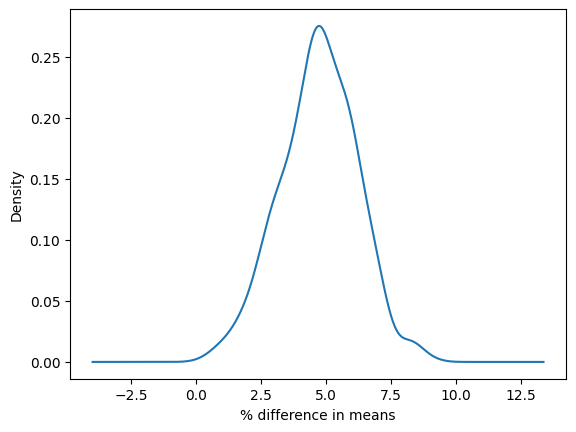

In [ ]:
ax= boot_7d['diff'].plot(kind='kde')
ax.set_xlabel("% difference in means")

###Probability of a difference
The probability of observing a difference in retention rates between the two AB groups when considering 7-day retention.

By analyzing the chart, we observe that the most probable percentage difference between the two AB groups is around 0%, with a all portion of the distribution above 0, favoring a gate at level 30. To determine the probability that the difference is above 0%, this calculation will be performed to provide a quantified measure of the likelihood.

In [ ]:
# Calculating the probability that 7-day retention is greater when the gate is at level 30
(boot_7d['diff'] > 0).sum() / len(boot_7d)

1.0

## The conclusion

The bootstrap analysis provides strong evidence that 7-day retention is higher when the gate is at level 30 compared to level 40. In conclusion, to maintain high retention rates for both 1-day and 7-day periods, it is advisable not to move the gate from level 30 to level 40. While there are other metrics like game rounds played and in-game purchases, retention remains one of the most crucial metrics. Without retaining the player base, the amount spent in-game becomes less impactful.

The observed higher retention when the gate is positioned earlier can be explained by the theory of hedonic adaptation. This theory suggests that continuous engagement in a fun activity may lead to diminishing enjoyment over time. By placing a gate at level 30, players are forced to take breaks, prolonging their enjoyment of the game. However, when the gate is moved to level 40, fewer players reach that point, potentially leading to a higher likelihood of boredom and, consequently, a higher dropout rate.